In [93]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

#условия, постановка задачи и начальные данные:
xl=-4   #границы по х
xr=6
ro1=1
u1=0
p1=1
ro2=0.125
u2=0
p2=0.1
n=101       #кол-во узлов по х
hx=0.1
ht=0.01
T=2.5   #до этого момента времени ведется счет
gam=1.4

k1=(2/0.4)*((1.4*(p1**(1/1.4))/ro1)**(1/2))
p3=0.3031301
u3=k1*(p1**(1/7)-p3**(1/7))
ro3=ro2*((gam+1)*p3+(gam-1)*p2)/((gam-1)*p3+(gam+1)*p2)
D=u3*ro3/(ro3-ro2)
ro31=ro1*(p3/p1)**(1/gam)
c31=(gam*p3/ro31)**(1/2)
c1=(gam*p1/ro1)**(1/2)

#точное решение
def Toch(x,t):
    if (x>=D*t):
        ro=ro2
        u=u2
        p=p2
    if (x<=-c1*t):
        ro=ro1
        u=u1
        p=p1
    if (x>=u3*t)and(x<D*t):
        ro=ro3
        u=u3
        p=p3
    if (x>=(u3-c31)*t)and(x<u3*t):
        ro=ro31
        u=u3
        p=p3
    if (x>=-c1*t)and(x<(u3-c31)*t):
        c=2*(c1-(gam-1)*x/(2*t))/(gam+1)
        ro=((c**2)*(ro1**gam)/(gam*p1))**(1/(gam-1))
        u=2*(c1+x/t)/(gam+1)
        p=(c**2)*ro/gam
    return(ro,u,p)

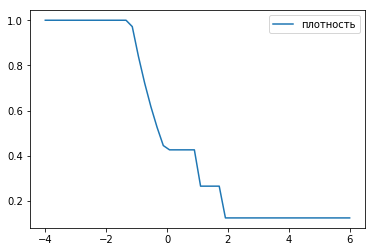

In [94]:
xGraph = np.linspace(xl,xr, 50)      
roGraph = np.zeros(50)

for i in range(50):  
    a123=Toch(xGraph[i],1)
    roGraph[i] = a123[0]
plt.plot(xGraph, roGraph, label = 'плотность')

plt.legend()

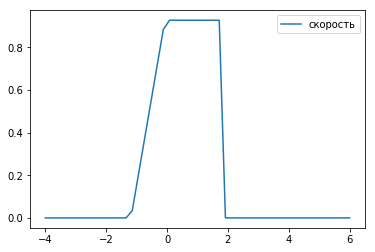

In [95]:
xGraph = np.linspace(xl,xr, 50)      
uGraph = np.zeros(50)

for i in range(50):  
    a123=Toch(xGraph[i],1)
    uGraph[i] = a123[1]
plt.plot(xGraph, uGraph, label = 'скорость')

plt.legend()

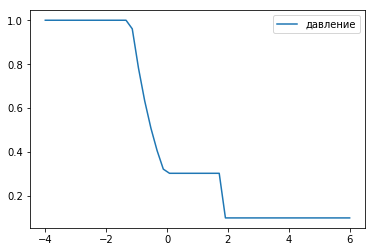

In [96]:
xGraph = np.linspace(xl,xr, 50)      
pGraph = np.zeros(50)

for i in range(50):  
    a123=Toch(xGraph[i],1)
    pGraph[i] = a123[2]
plt.plot(xGraph, pGraph, label = 'давление')

plt.legend()

In [116]:
#поехали.....

x= np.linspace(xl,xr, n)  
ro= np.zeros(n)
u = np.zeros(n)
p = np.zeros(n)
t=0  
T1=ht                  
for i in range(n):      #ro u p в нулевой момент времени    
    a123=Toch(x[i],0)
    ro[i] = a123[0]
    u[i] = a123[1]
    p[i] = a123[2]
    
U= np.zeros((3,n))    #задаем матрицу U в нулевой момент времени
for j in range(n):
    U[0,j]=ro[j]
    U[1,j]=ro[j]*u[j]
    U[2,j]=(((u[j]**2)/2)+(p[j]/(ro[j]*(gam-1))))*ro[j]
U= np.matrix(U)
              #фиксируем временной слой и находим на нём матрицу U - каждая строка (их три) отвечает одной из искомых функций 
while (t<=T1):           
    t=t+ht
    q= np.zeros((3,n))
    q=np.matrix(q)
    q1= np.zeros((3,n))
    q1=np.matrix(q1)
    H= np.zeros(n)
    c= np.zeros(n)
    for j in range(n-1):   #на этом временном слое задаем Н и с, основываясь на имеющихся значениях (с предыдущего слоя) 
        c[j]=(gam*p[j]/ro[j])**(1/2)
        H[j]=(c[j]**2)/(gam-1)+(u[j]**2)/2
    for j in range(n-1):    #прогонка для нахождения q с волной
        A=np.matrix([[0, 1, 0], [(1/2)*(gam-1)*(u[j])**2, (3-gam)*u[j], gam-1], [((gam-1)/2)*(u[j]**3)-u[j]*H[j], H[j]-(gam-1)*(u[j]**2), gam*u[j]]])
        F= A*U
        up=(u[j]*((ro[j])**(1/2))+u[j+1]*(ro[j+1]**(1/2)))/(ro[j]**(1/2)+ro[j+1]**(1/2))
        Hp=(H[j]*((ro[j])**(1/2))+H[j+1]*(ro[j+1]**(1/2)))/(ro[j]**(1/2)+ro[j+1]**(1/2))
        um=(u[j]*((ro[j])**(1/2))+u[j-1]*(ro[j-1]**(1/2)))/(ro[j]**(1/2)+ro[j-1]**(1/2))
        Hm=(H[j]*((ro[j])**(1/2))+H[j-1]*(ro[j-1]**(1/2)))/(ro[j]**(1/2)+ro[j-1]**(1/2))
        
        cp=(c[j]+c[j+1])/2
        cm=(c[j]+c[j-1])/2
        
        Dpp=np.matrix([[(up-cp+abs(up-cp))/2, 0, 0], [0, (up+abs(up))/2,0], [0, 0, (up+cp+abs(up+cp))/2]])
        Dpm=np.matrix([[(up-cp-abs(up-cp))/2, 0, 0], [0, (up-abs(up))/2,0], [0, 0, (up+cp-abs(up+cp))/2]])
        Dmp=np.matrix([[(um-cm+abs(um-cm))/2, 0, 0], [0, (um+abs(um))/2,0], [0, 0, (um+cm+abs(um+cm))/2]])
        Dmm=np.matrix([[(um-cm-abs(um-cm))/2, 0, 0], [0, (um-abs(um))/2,0], [0, 0, (um+cm-abs(um+cm))/2]])
        Lp=np.matrix([[up*cp+(gam-1)*(up**2)/2, -cp-(gam-1)*up, gam-1], [1-(gam-1)*(up**2)/(2*(cp**2)), (gam-1)*up/(cp**2), -(gam-1)/(cp**2)], [-up*cp+(gam-1)*(up**2)/2, cp-(gam-1)*up, gam-1]]) 
        Rp=np.matrix([[1/(2*(cp**2)), 1, 1/(2*(cp**2))], [(up-cp)/(2*(cp**2)), up, (up+cp)/(2*(cp**2))], [(Hp-up*cp)/(2*(cp**2)), (up**2)/2, (Hp+up*cp)/(2*(cp**2))]]) 
        Lm=np.matrix([[um*cm+(gam-1)*(um**2)/2, -cm-(gam-1)*um, gam-1], [1-(gam-1)*(um**2)/(2*(cm**2)), (gam-1)*um/(cm**2), -(gam-1)/(cm**2)], [-um*cm+(gam-1)*(um**2)/2, cp-(gam-1)*um, gam-1]]) 
        Rm=np.matrix([[1/(2*(cm**2)), 1, 1/(2*(cm**2))], [(um-cm)/(2*(cm**2)), um, (um+cm)/(2*(cm**2))], [(Hm-um*cm)/(2*(cm**2)), (um**2)/2, (Hm+um*cm)/(2*(cm**2))]])                
        
        Ap=np.array([[0, 1, 0], [(1/2)*(gam-1)*(up)**2, (3-gam)*up, gam-1], [(1/2)*(gam-1)*up**3-u1p2*Hp, Hp-(gam-1)*up**2, gam*up]])
        Am=np.array([[0, 1, 0], [(1/2)*(gam-1)*(um)**2, (3-gam)*um, gam-1], [(1/2)*(gam-1)*um**3-u1m2*Hm, Hm-(gam-1)*um**2, gam*um]])
        
        App=Rp*Dpp*Lp
        Apm=Rp*Dpm*Lp
        Amp=Rm*Dmp*Lm
        Amm=Rm*Dmm*Lm
        
        Apabs=App-Apm
        Amabs=Amp-Amm
        I=np.eye(3)
        Om=I+(ht/hx)*(Amp-Apm)
        Om=np.linalg.inv(Om)
        
        q1[:,j+1]=Om*(ht/hx)*(Amp*q1[:,j]-F[:,j+1] -F[:,j-1]-Apabs*(U[:,j+1]-U[:,j])+Amabs*(U[:,j]-U[:,j-1]))/2
    for i in range(n):
        j=n-i-1
        
        q[:,j]=q1[:,j]-(ht/hx)*Om*Apm*q[:,j]
        U[:,j]=q[:,j]+U[:,j]
        ro[j]= U[0,j]
        u[j] = U[1,j]/ro[j]
        p[j] =(U[2,j]/ro[j]-((u[j])**2)/2)*ro[j]*(gam-1)    

[ 1.          1.20763973  1.02733207  1.00585413  1.0112301   1.01178906
  1.01182707  1.0118295   1.01182965  1.01182965  1.01182965  1.01182965
  1.01182965  1.01182965  1.01182965  1.01182965  1.01182965  1.01182965
  1.01182965  1.01182965  1.01182965  1.01182965  1.01182965  1.01182965
  1.01182965  1.01182965  1.01182965  1.01182965  1.01182965  1.01182965
  1.01182965  1.01182965  1.01182965  1.01182965  1.01182965  1.01182965
  1.01182965  1.01182965  1.01182965  1.01182965  1.01182965  0.28867243
 -0.00655432  0.11747773  0.13054909  0.12658281  0.12628577  0.1262678
  0.12626677  0.12626671  0.12626671  0.12626671  0.12626671  0.12626671
  0.12626671  0.12626671  0.12626671  0.12626671  0.12626671  0.12626671
  0.12626671  0.12626671  0.12626671  0.12626671  0.12626671  0.12626671
  0.12626671  0.12626671  0.12626671  0.12626671  0.12626671  0.12626671
  0.12626671  0.12626671  0.12626671  0.12626671  0.12626671  0.12626671
  0.12626671  0.12626671  0.12626671  0.12626671  0.

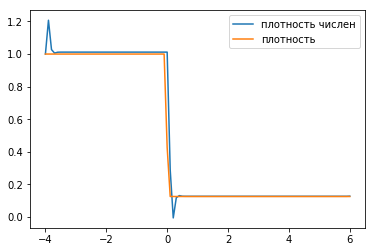

In [117]:
plt.plot(x,ro, label = 'плотность числен')     
roGraph = np.zeros(n)

for i in range(n):  
    a123=Toch(x[i],T1)
    roGraph[i] = a123[0]
plt.plot(x, roGraph, label = 'плотность')

plt.legend()
print(ro)

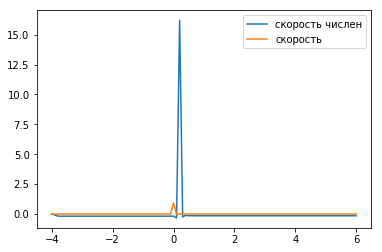

In [118]:
plt.plot(x,u, label = 'скорость числен')     
uGraph = np.zeros(n)

for i in range(n):  
    a123=Toch(x[i],T1)
    uGraph[i] = a123[1]
plt.plot(x, uGraph, label = 'скорость')

plt.legend()

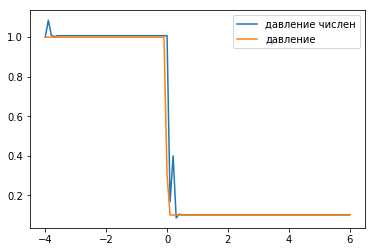

In [119]:
plt.plot(x,p, label = 'давление числен')     
pGraph = np.zeros(n)

for i in range(n):  
    a123=Toch(x[i],T1)
    pGraph[i] = a123[2]
plt.plot(x, pGraph, label = 'давление')

plt.legend()

In [120]:
print(App,'\n', Apm, '\n',Amp,'\n', Amm)

[[ 4.67443105e-01 -1.67297699e+00  4.67443105e-01]
 [ 4.96883596e-04 -1.77834439e-03  4.96883596e-04]
 [ 4.42009895e-01 -1.58195164e+00  4.42009895e-01]] 
 [[ 0.0011783  -1.08240918  0.0011783 ]
 [ 0.02015706 -0.60073257 -0.02115082]
 [ 0.07096372 -1.06761027 -0.076877  ]] 
 [[ 0.5063954  -0.45309678  0.5063954 ]
 [ 0.00102764 -0.00091948  0.00102764]
 [ 0.47947856 -0.42901296  0.47947856]] 
 [[ 5.27164945e-04 -5.05739891e-01 -1.87631201e-02]
 [ 7.96951308e-02 -1.12848824e+00 -8.45078995e-02]
 [ 7.07799733e-02 -5.03973827e-01 -5.68502380e-02]]


In [121]:
print(Dpp,'\n', Dpm, '\n',Dmp,'\n', Dmm)

[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.45467019]] 
 [[-0.60251091  0.          0.        ]
 [ 0.         -0.07392036  0.        ]
 [ 0.          0.          0.        ]] 
 [[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.98495448]] 
 [[-1.12940772  0.          0.        ]
 [ 0.         -0.07222662  0.        ]
 [ 0.          0.          0.        ]]


In [122]:
print(App+ Apm,'\n', Ap)

[[ 0.4686214  -2.75538618  0.4686214 ]
 [ 0.02065394 -0.60251091 -0.02065394]
 [ 0.51297362 -2.64956191  0.36513289]] 
 [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 1.09284402e-03 -1.18272581e-01  4.00000000e-01]
 [ 2.09558603e-01  1.39502719e+00 -1.03488509e-01]]


In [123]:
print(up,um,(u[n-2]*((ro[n-2])**(1/2))+u[n-1]*(ro[n-1]**(1/2)))/(ro[n-2]**(1/2)+ro[n-1]**(1/2)), u[n-2], u[n-1])

-0.07392036335886708 -0.07222661748794157 -0.14680101693974948 -0.1437794629040611 -0.14981187972912605


In [124]:
print(Lp*Rp-I,'\n',Lm*Rm-I,'\n',Rp*Lp-I,'\n',Rm*Lm-I)

[[-1.11022302e-16 -8.26116054e-18  2.72210078e-03]
 [ 2.28687151e-17 -1.11022302e-16  7.36495508e-02]
 [ 1.86963342e-17 -1.67538326e-17  9.96336428e-01]] 
 [[-1.11022302e-16 -1.56862757e-18  1.80756989e-17]
 [-2.36477932e-01 -2.32919999e-01 -6.43298348e-01]
 [ 4.67408354e-18 -5.83031550e-18 -1.11022302e-16]] 
 [[ 4.98168214e-01 -1.78294204e+00  4.98168214e-01]
 [-2.23759212e-18  0.00000000e+00 -2.23759212e-18]
 [ 4.98168214e-01 -1.78294204e+00  4.98168214e-01]] 
 [[ 0.00000000e+00  6.86314808e-17  2.67080001e-01]
 [ 2.54389024e-18 -1.11022302e-16  3.81783075e-02]
 [ 2.51348361e-17 -1.02522494e-17 -2.32919999e-01]]
